1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


The integral of the original histogram is:  9.769867613432929
The integral of the normalized sumation of guassians is:  9.969252651781055


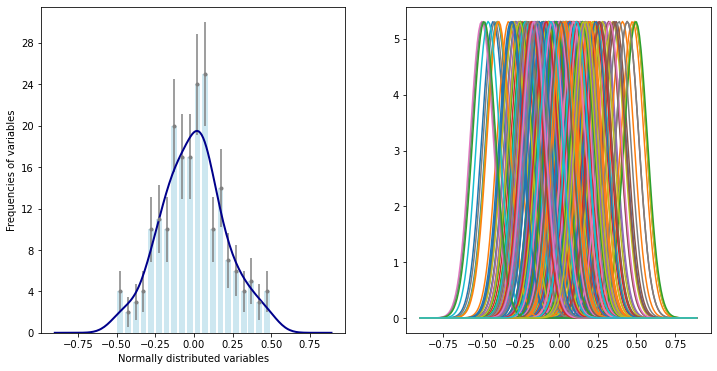

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats, integrate
import pandas as pd

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
mu, sigma = 0, 0.2 # mean and standard deviation
N=200
s = np.random.normal(mu, sigma, N)
bins=20

rangee = np.arange(-0.9, 0.9, 0.01)

ax1.hist(s ,bins=bins,color='lightblue',alpha=0.6,rwidth=0.75)
hist, rang =  np.histogram(s, bins = bins)
mid = (rang[:-1] + rang[1:]) / 2
binwidth=mid[1]-mid[0]
ax1.errorbar(mid,hist,np.sqrt(hist), fmt=".",color="gray")
ax1.set_xlabel('Normally distributed variables')
ax1.set_ylabel('Frequencies of variables')
ax1.set_yticks(range(0,int(max(np.sqrt(hist)))+max(hist)+4,4))
    
s2=[]
for i in s:
    i2=stats.norm(i, 1.06*s.std()*s.size**(-1/5))
    s2.append(i2)
gaussian=np.array(s2)
s3=[]
for ig in gaussian:
    ax2.plot(rangee, ig.pdf(rangee))
    s3.append(ig.pdf(rangee))

gaussian2=np.array(s3)

sum_gaussian=np.sum(gaussian2,axis=0)
normalized_sum_gaussian=sum_gaussian*binwidth

int__normalized_gaussian=integrate.trapz(normalized_sum_gaussian,rangee)
int_hist=integrate.trapz(hist,mid)

ax1.plot(rangee, normalized_sum_gaussian,  color="darkblue",linewidth=2)

print('The integral of the original histogram is: ',int_hist)
print('The integral of the normalized sumation of guassians is: ',int__normalized_gaussian)
    

plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

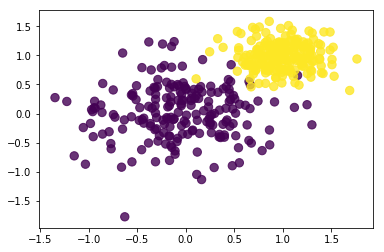

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

<ipython-input-166-042e690f7d1c>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x,y = random.multivariate_normal([mu+6*i, mu+6*i], [[std*m, 0],[0, std*m]], int(300+100*m)).T


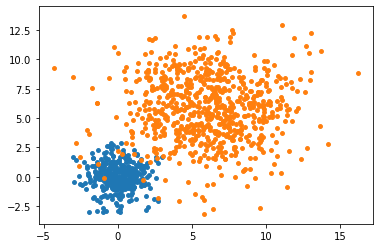

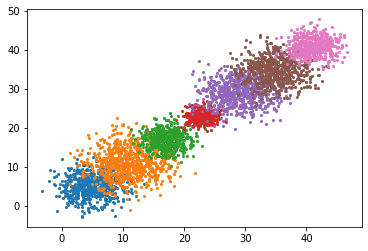

In [166]:
import matplotlib.pyplot as plt
from numpy import random

def generator(mu,std,n):
    for i in range(n):
        m=random.random(1)+random.randint(0,5)
        x,y = random.multivariate_normal([mu+6*i, mu+6*i], [[std*m, 0],[0, std*m]], int(300+100*m)).T
        scatter=plt.scatter(x,y,s=30/n)

generator(0,2,2)
plt.show()

generator(5,3,7)
plt.show()


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [1]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2021-12-10 00:36:55--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2021-12-10 00:36:56--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc75b1b0a22c7a9db9db0076525f.dl.dropboxusercontent.com/cd/0/inline/BbggDkKOf4jE5UDVh3Xo4sjM4AnK3brlMHViGBbD6BDeeZxViLbmDUVy3PljVQWHztmxoEh4zaY89TuVTx06lKdjQKVr4FdgQ_pBDmRlmVgrYuB4X2ttxAbu3LdLqDNFji_Qj_w3YSvi7DvUYZKSySpn/file# [following]
--2021-12-10 00:36:56--  https://uc75b1b0a22c7a9db9db0076525f.dl.dropboxusercontent.com/cd/0/inline/BbggDkKOf4jE5UDVh3Xo4sjM4AnK3brlMHViGBbD6BDeeZxViLbmDUVy3PljVQWHztmxoEh4

In [2]:
import numpy as np
import pandas as pd
from scipy import stats


data=np.load('residuals_261.npy',allow_pickle=True)
data2=data.item()
df=pd.DataFrame(data2)

In [3]:
df.head(4)

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4


In [4]:
df=df[abs(df['residuals'])<2]
df.head(10)

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
11,-0.130000,9.3
12,-0.090000,10.2
13,0.210000,12.2
14,0.170000,7.9
15,0.042857,4.5


/tmp/ipykernel_7322/1642471660.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2=df20[(df20['distances']>=rang[i] )& (df['distances']<rang[i+1])]


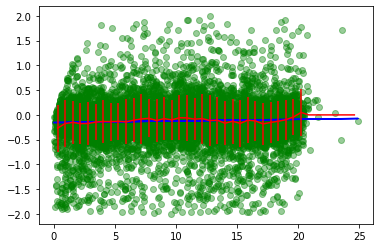

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

res= stats.linregress(df['distances'],df['residuals'])
plt.plot(df['distances'], df['residuals'],'o', label='original data',color='green',alpha=0.4)
plt.plot(df['distances'], res.intercept + res.slope*df['distances'], 'b')
bins=40
hist, rang =  np.histogram(df['distances'], bins = bins)
x = (rang[:-1] + rang[1:]) / 2
y=[]
err=[]
df20=df[df['distances']<=20]
for i in range(len(rang)-1):
    df2=df20[(df20['distances']>=rang[i] )& (df['distances']<rang[i+1])]
    y.append(df2['residuals'].mean())
    err.append(df2['residuals'].std())

y2 = [0 if i != i else i for i in y] 
err2 = [0 if i != i else i for i in err] 
plt.errorbar(x=x,y=y2,yerr=err2,color='r')
plt.show()

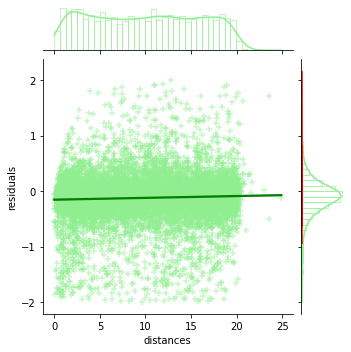

In [8]:
#the answer is this code but there is a problem in showing plot, so the next block is just showing plots separately
import seaborn as sns
sns.jointplot(x='distances',y='residuals',data=df,kind='reg',color="lightgreen",marker="+", height=5,
              joint_kws={'line_kws':{'color':'green'},'scatter_kws':{'alpha':.5}},
                 marginal_kws=dict(bins=40, fill=False))

bins=40
hist, rang =  np.histogram(df['distances'], bins = bins)
x = (rang[:-1] + rang[1:]) / 2

y=[]
err=[]
for i in range(len(rang)-1):
    df2=df[(df['distances']>=rang[i] )& (df['distances']<rang[i+1])]
    y.append(df2['residuals'].mean())
    err.append(df2['residuals'].std())

y2 = [0 if i != i else i for i in y] 
err2 = [0 if i != i else i for i in err] 
plt.errorbar(x=x,y=y2,yerr=err2,color='r')


plt.show()

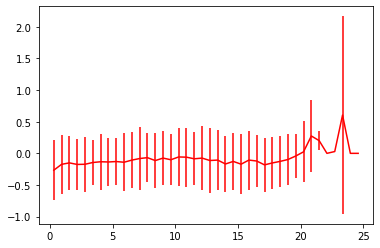

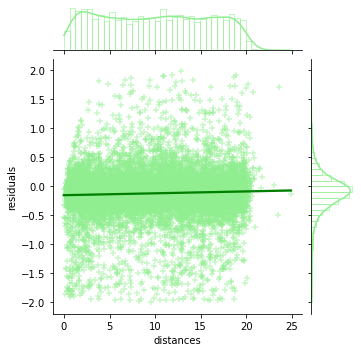

In [9]:
import seaborn as sns

bins=40
hist, rang =  np.histogram(df['distances'], bins = bins)
x = (rang[:-1] + rang[1:]) / 2

y=[]
err=[]
for i in range(len(rang)-1):
    df2=df[(df['distances']>=rang[i] )& (df['distances']<rang[i+1])]
    y.append(df2['residuals'].mean())
    err.append(df2['residuals'].std())

y2 = [0 if i != i else i for i in y] 
err2 = [0 if i != i else i for i in err] 
plt.errorbar(x=x,y=y2,yerr=err2,color='r')

sns.jointplot(x='distances',y='residuals',data=df,kind='reg',color="lightgreen",marker="+", height=5,
              joint_kws={'line_kws':{'color':'green'},'scatter_kws':{'alpha':.5}},
                 marginal_kws=dict(bins=40, fill=False))

plt.show()